# Packages

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import MinMaxScaler

from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 

from scipy import interp
from itertools import cycle
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from xgboost import plot_importance
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")

# Load Data

In [ ]:
df = pd.read_csv('FilteredData.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

In [ ]:
print(df.shape)


(4883, 194)


## Preprocessing Data

In [ ]:
df.columns

Index(['Mã CK', 'Tên', 'Sàn', 'Year', 'I. TÀI SẢN NGẮN HẠN Hợp nhất',
       '1. Tiền và tương đương tiền  Hợp nhất', '1.1. Tiền Hợp nhất',
       '1.2. Các khoản tương đương tiền Hợp nhất',
       '2. Đầu tư tài chính ngắn hạn Hợp nhất',
       '2.1. Chứng khoán kinh doanh Hợp nhất',
       ...
       '3. Tiền thu được các khoản đi vay (GT) Hợp nhất',
       '4. Tiền trả nợ gốc vay (GT) Hợp nhất',
       '5. Tiền thanh toán vốn gốc đi thuê tài chính (GT) Hợp nhất',
       '6. Cổ tức đã trả (GT) Hợp nhất', '7. Tiền lãi đã nhận (GT) Hợp nhất',
       'IV. Lưu chuyển tiền thuần trong kỳ (GT) Hợp nhất',
       'V. Tiền và tương đương tiền đầu kỳ (GT) Hợp nhất',
       'VI. Ảnh hưởng của chênh lệch tỷ giá (GT) Hợp nhất',
       'VII. Tiền và tương đương tiền cuối kỳ (GT) Hợp nhất', 'fraud'],
      dtype='object', length=194)

In [ ]:
#Remove duplicate records
df = df.drop_duplicates()
#Replace NaN values by 0
df = df.fillna(0)
#Drop ‘unnamed’ rows
#df = df.drop(['CountBS', 'CountIS', 'CountFS','zscore', 'mscore'], axis =1)


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.isnull().sum()

Mã CK                                                                                                       0
Tên                                                                                                         0
Sàn                                                                                                         0
Year                                                                                                        0
I. TÀI SẢN NGẮN HẠN Hợp nhất                                                                                0
1. Tiền và tương đương tiền  Hợp nhất                                                                       0
1.1. Tiền Hợp nhất                                                                                          0
1.2. Các khoản tương đương tiền Hợp nhất                                                                    0
2. Đầu tư tài chính ngắn hạn Hợp nhất                                                                       0
2.1. Chứng

## Data Understanding

In [ ]:
print('number of records', df.shape[0])

number of records 4883


In [ ]:
print('number of each class')
df_plot = df.groupby(['fraud'])[['Mã CK']].count()
df_plot.reset_index(level=0, inplace=True)
df_plot

number of each class


,fraud,Mã CK
0,0,4025
1,1,858


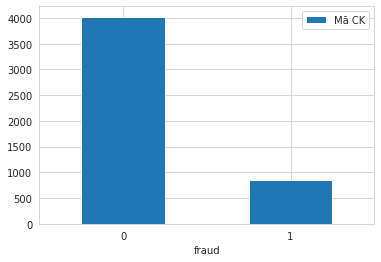

In [ ]:
ax = df_plot.plot.bar(x='fraud', y='Mã CK', rot=0)

### Findings

<font face = "Verdana" size ="3"> 
<br> 1/ The ratio of fraudulent FS non fraudulent ones is considerably small, which resulted in the imbalanced data
<br> 2/ Second is the variation in cost since it is more costly to classify a fraud firm as a nonfraud one than to classify in the reverse
<br> 3/ The attributes used to detect fraud are relatively noisy, where similar attribute values can be extracted from both fraudulent and non fraudulent activities
<br> 4/ Fraud commiters actively attempt to conceal the fraud, thereby making fraud firm attribute values look similar to nonfraud firm attribute values


## Data Nomarlization - Min Max Scale

In [ ]:
df1 = df.copy()

In [ ]:
df1

In [ ]:

cols = df1[df1.columns.difference(['Mã CK','Tên', 'Sàn', 'Year', 'fraud'], sort=False)]
cols

,I. TÀI SẢN NGẮN HẠN Hợp nhất,1. Tiền và tương đương tiền Hợp nhất,1.1. Tiền Hợp nhất,1.2. Các khoản tương đương tiền Hợp nhất,2. Đầu tư tài chính ngắn hạn Hợp nhất,2.1. Chứng khoán kinh doanh Hợp nhất,2.2. Dự phòng giảm giá chứng khoán kinh doanh Hợp nhất,2.3. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,3. Các khoản phải thu ngắn hạn Hợp nhất,3.1. Phải thu ngắn hạn của khách hàng Hợp nhất,3.2. Trả trước cho người bán ngắn hạn Hợp nhất,3.3. Phải thu nội bộ ngắn hạn Hợp nhất,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,3.5. Phải thu về cho vay ngắn hạn Hợp nhất,3.6. Phải thu ngắn hạn khác Hợp nhất,3.7. Dự phòng phải thu ngắn hạn khó đòi Hợp nhất,3.8. Tài sản thiếu chờ xử lý Hợp nhất,"4. Hàng tồn kho, ròng Hợp nhất",4.1. Hàng tồn kho Hợp nhất,4.2. Dự phòng giảm giá HTK Hợp nhất,5. Tài sản ngắn hạn khác Hợp nhất,5.1. Chi phí trả trước ngắn hạn Hợp nhất,5.2. Thuế GTGT được khấu trừ Hợp nhất,5.3. Thuế và các khoản khác phải thu Nhà nước Hợp nhất,5.4. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,5.5. Tài sản ngắn hạn khác Hợp nhất,II. TÀI SẢN DÀI HẠN Hợp nhất,1. Phải thu dài hạn Hợp nhất,1.1. Phải thu khách hang dài hạn Hợp nhất,1.2. Trả trước người bán dài hạn Hợp nhất,1.3. Vốn kinh doanh ở các đơn vị trực thuộc Hợp nhất,1.4. Phải thu nội bộ dài hạn Hợp nhất,1.5. Phải thu về cho vay dài hạn Hợp nhất,1.6. Phải thu dài hạn khác Hợp nhất,1.7. Dự phòng phải thu dài hạn Hợp nhất,2. Tài sản cố định Hợp nhất,2.1. GTCL TSCĐ hữu hình Hợp nhất,2.1.1. Nguyên giá TSCĐ hữu hình Hợp nhất,2.1.2. Khấu hao lũy kế TSCĐ hữu hình Hợp nhất,2.2. GTCL Tài sản thuê tài chính Hợp nhất,2.2.1. Nguyên giá tài sản thuê tài chính Hợp nhất,2.2.2. Khấu hao lũy kế tài sản thuê tài chính Hợp nhất,2.3. GTCL tài sản cố định vô hình Hợp nhất,2.3.1. Nguyên giá TSCĐ vô hình Hợp nhất,2.3.2. Khấu khao lũy kế TSCĐ vô hình Hợp nhất,2.4. Xây dựng cơ bản dở dang (trước 2015) Hợp nhất,3. Giá trị ròng tài sản đầu tư Hợp nhất,3.1. Nguyên giá tài sản đầu tư Hợp nhất,3.2. Khấu hao lũy kế tài sản đầu tư Hợp nhất,4. Tài sản dở dang dài hạn Hợp nhất,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn Hợp nhất",4.2. Xây dựng cơ bản dở dang Hợp nhất,5. Đầu tư dài hạn Hợp nhất,5.1. Đầu tư vào các công ty con Hợp nhất,5.2. Đầu tư vào các công ty liên kết Hợp nhất,5.3. Đầu tư dài hạn khác Hợp nhất,5.4. Dự phòng giảm giá đầu tư dài hạn Hợp nhất,5.5. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,6. Lợi thế thương mại (trước 2015) Hợp nhất,7. Tài sản dài hạn khác Hợp nhất,7.1. Trả trước dài hạn Hợp nhất,7.2. Tài sản thuế thu nhập hoãn lại Hợp nhất,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn Hợp nhất",7.4. Các tài sản dài hạn khác Hợp nhất,7.5. Lợi thế thương mại Hợp nhất,A. TỔNG CỘNG TÀI SẢN Hợp nhất,I. NỢ PHẢI TRẢ Hợp nhất,1. Nợ ngắn hạn Hợp nhất,1.1. Phải trả người bán ngắn hạn Hợp nhất,1.2. Người mua trả tiền trước ngắn hạn Hợp nhất,1.3. Thuế và các khoản phải trả Nhà nước Hợp nhất,1.4. Phải trả người lao động Hợp nhất,1.5. Chi phí phải trả ngắn hạn Hợp nhất,1.6. Phải trả nội bộ ngắn hạn Hợp nhất,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,1.8. Doanh thu chưa thực hiện ngắn hạn Hợp nhất,1.9. Phải trả khác Hợp nhất,1.10. Vay và nợ thuê tài chính ngắn hạn Hợp nhất,1.11. Dự phòng các khoản phải trả ngắn hạn Hợp nhất,"1.12. Quỹ khen thưởng, phúc lợi Hợp nhất",1.13. Quỹ bình ổn giá Hợp nhất,1.14. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,2. Nợ dài hạn Hợp nhất,2.1. Phải trả nhà cung cấp dài hạn Hợp nhất,2.2. Người mua trả tiền trước dài hạn Hợp nhất,2.3. Chi phí phải trả dài hạn Hợp nhất,2.4. Phải trả nội bộ về vốn kinh doanh Hợp nhất,2.5. Phải trả nội bộ dài hạn Hợp nhất,2.6. Doanh thu chưa thực hiên dài hạn Hợp nhất,2.7. Phải trả dài hạn khác Hợp nhất,2.8. Vay và nợ thuê tài chính dài hạn Hợp nhất,2.9. Trái phiếu chuyển đổi Hợp nhất,2.10. Cổ phiếu ưu đãi Hợp nhất,2.11. Thuế thu nhập hoãn lại phải trả Hợp nhất,2.12. Dự phòng trợ cấp thôi việc Hợp nhất,2.13. Dự phòng phải trả dài hạn Hợp nhất,2.14. Quỹ phát triển khoa học công nghệ Hợp nhất,II

In [ ]:
#cols = df1.iloc[:, df1.columns != 'fraud_or_not']
pd.isnull(df1[cols.columns]).sum() > 0
df1[cols.columns] = MinMaxScaler().fit_transform(df1[cols.columns])

df1.head()

# Spliting Data

In [ ]:
X = df1[df1.columns.difference(['Mã CK','Tên', 'Sàn', 'Year', 'fraud'], sort=False)]
y = df1.iloc[:, df1.columns == 'fraud']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (4883, 189)
Shape of y: (4883, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X = df1[df1.columns.difference(['Mã CK','Tên', 'Sàn', 'Year', 'fraud'], sort=False)]
y = df1.iloc[:, df1.columns == 'fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3418, 189)
Number transactions y_train dataset:  (3418, 1)
Number transactions X_test dataset:  (1465, 189)
Number transactions y_test dataset:  (1465, 1)


In [ ]:
X_train

,I. TÀI SẢN NGẮN HẠN Hợp nhất,1. Tiền và tương đương tiền Hợp nhất,1.1. Tiền Hợp nhất,1.2. Các khoản tương đương tiền Hợp nhất,2. Đầu tư tài chính ngắn hạn Hợp nhất,2.1. Chứng khoán kinh doanh Hợp nhất,2.2. Dự phòng giảm giá chứng khoán kinh doanh Hợp nhất,2.3. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,3. Các khoản phải thu ngắn hạn Hợp nhất,3.1. Phải thu ngắn hạn của khách hàng Hợp nhất,3.2. Trả trước cho người bán ngắn hạn Hợp nhất,3.3. Phải thu nội bộ ngắn hạn Hợp nhất,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,3.5. Phải thu về cho vay ngắn hạn Hợp nhất,3.6. Phải thu ngắn hạn khác Hợp nhất,3.7. Dự phòng phải thu ngắn hạn khó đòi Hợp nhất,3.8. Tài sản thiếu chờ xử lý Hợp nhất,"4. Hàng tồn kho, ròng Hợp nhất",4.1. Hàng tồn kho Hợp nhất,4.2. Dự phòng giảm giá HTK Hợp nhất,5. Tài sản ngắn hạn khác Hợp nhất,5.1. Chi phí trả trước ngắn hạn Hợp nhất,5.2. Thuế GTGT được khấu trừ Hợp nhất,5.3. Thuế và các khoản khác phải thu Nhà nước Hợp nhất,5.4. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,5.5. Tài sản ngắn hạn khác Hợp nhất,II. TÀI SẢN DÀI HẠN Hợp nhất,1. Phải thu dài hạn Hợp nhất,1.1. Phải thu khách hang dài hạn Hợp nhất,1.2. Trả trước người bán dài hạn Hợp nhất,1.3. Vốn kinh doanh ở các đơn vị trực thuộc Hợp nhất,1.4. Phải thu nội bộ dài hạn Hợp nhất,1.5. Phải thu về cho vay dài hạn Hợp nhất,1.6. Phải thu dài hạn khác Hợp nhất,1.7. Dự phòng phải thu dài hạn Hợp nhất,2. Tài sản cố định Hợp nhất,2.1. GTCL TSCĐ hữu hình Hợp nhất,2.1.1. Nguyên giá TSCĐ hữu hình Hợp nhất,2.1.2. Khấu hao lũy kế TSCĐ hữu hình Hợp nhất,2.2. GTCL Tài sản thuê tài chính Hợp nhất,2.2.1. Nguyên giá tài sản thuê tài chính Hợp nhất,2.2.2. Khấu hao lũy kế tài sản thuê tài chính Hợp nhất,2.3. GTCL tài sản cố định vô hình Hợp nhất,2.3.1. Nguyên giá TSCĐ vô hình Hợp nhất,2.3.2. Khấu khao lũy kế TSCĐ vô hình Hợp nhất,2.4. Xây dựng cơ bản dở dang (trước 2015) Hợp nhất,3. Giá trị ròng tài sản đầu tư Hợp nhất,3.1. Nguyên giá tài sản đầu tư Hợp nhất,3.2. Khấu hao lũy kế tài sản đầu tư Hợp nhất,4. Tài sản dở dang dài hạn Hợp nhất,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn Hợp nhất",4.2. Xây dựng cơ bản dở dang Hợp nhất,5. Đầu tư dài hạn Hợp nhất,5.1. Đầu tư vào các công ty con Hợp nhất,5.2. Đầu tư vào các công ty liên kết Hợp nhất,5.3. Đầu tư dài hạn khác Hợp nhất,5.4. Dự phòng giảm giá đầu tư dài hạn Hợp nhất,5.5. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,6. Lợi thế thương mại (trước 2015) Hợp nhất,7. Tài sản dài hạn khác Hợp nhất,7.1. Trả trước dài hạn Hợp nhất,7.2. Tài sản thuế thu nhập hoãn lại Hợp nhất,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn Hợp nhất",7.4. Các tài sản dài hạn khác Hợp nhất,7.5. Lợi thế thương mại Hợp nhất,A. TỔNG CỘNG TÀI SẢN Hợp nhất,I. NỢ PHẢI TRẢ Hợp nhất,1. Nợ ngắn hạn Hợp nhất,1.1. Phải trả người bán ngắn hạn Hợp nhất,1.2. Người mua trả tiền trước ngắn hạn Hợp nhất,1.3. Thuế và các khoản phải trả Nhà nước Hợp nhất,1.4. Phải trả người lao động Hợp nhất,1.5. Chi phí phải trả ngắn hạn Hợp nhất,1.6. Phải trả nội bộ ngắn hạn Hợp nhất,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,1.8. Doanh thu chưa thực hiện ngắn hạn Hợp nhất,1.9. Phải trả khác Hợp nhất,1.10. Vay và nợ thuê tài chính ngắn hạn Hợp nhất,1.11. Dự phòng các khoản phải trả ngắn hạn Hợp nhất,"1.12. Quỹ khen thưởng, phúc lợi Hợp nhất",1.13. Quỹ bình ổn giá Hợp nhất,1.14. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,2. Nợ dài hạn Hợp nhất,2.1. Phải trả nhà cung cấp dài hạn Hợp nhất,2.2. Người mua trả tiền trước dài hạn Hợp nhất,2.3. Chi phí phải trả dài hạn Hợp nhất,2.4. Phải trả nội bộ về vốn kinh doanh Hợp nhất,2.5. Phải trả nội bộ dài hạn Hợp nhất,2.6. Doanh thu chưa thực hiên dài hạn Hợp nhất,2.7. Phải trả dài hạn khác Hợp nhất,2.8. Vay và nợ thuê tài chính dài hạn Hợp nhất,2.9. Trái phiếu chuyển đổi Hợp nhất,2.10. Cổ phiếu ưu đãi Hợp nhất,2.11. Thuế thu nhập hoãn lại phải trả Hợp nhất,2.12. Dự phòng trợ cấp thôi việc Hợp nhất,2.13. Dự phòng phải trả dài hạn Hợp nhất,2.14. Quỹ phát triển khoa học công nghệ Hợp nhất,II

# Dealing with imbalanced data

In [ ]:
import imblearn

print(imblearn.__version__)
# combination of random oversampling and undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

0.8.1


In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[0 0 0 ... 1 1 0]
binary
binary
binary


In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train_encoded)

In [ ]:
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)

In [ ]:
X_train_res.head()

,I. TÀI SẢN NGẮN HẠN Hợp nhất,1. Tiền và tương đương tiền Hợp nhất,1.1. Tiền Hợp nhất,1.2. Các khoản tương đương tiền Hợp nhất,2. Đầu tư tài chính ngắn hạn Hợp nhất,2.1. Chứng khoán kinh doanh Hợp nhất,2.2. Dự phòng giảm giá chứng khoán kinh doanh Hợp nhất,2.3. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,3. Các khoản phải thu ngắn hạn Hợp nhất,3.1. Phải thu ngắn hạn của khách hàng Hợp nhất,3.2. Trả trước cho người bán ngắn hạn Hợp nhất,3.3. Phải thu nội bộ ngắn hạn Hợp nhất,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,3.5. Phải thu về cho vay ngắn hạn Hợp nhất,3.6. Phải thu ngắn hạn khác Hợp nhất,3.7. Dự phòng phải thu ngắn hạn khó đòi Hợp nhất,3.8. Tài sản thiếu chờ xử lý Hợp nhất,"4. Hàng tồn kho, ròng Hợp nhất",4.1. Hàng tồn kho Hợp nhất,4.2. Dự phòng giảm giá HTK Hợp nhất,5. Tài sản ngắn hạn khác Hợp nhất,5.1. Chi phí trả trước ngắn hạn Hợp nhất,5.2. Thuế GTGT được khấu trừ Hợp nhất,5.3. Thuế và các khoản khác phải thu Nhà nước Hợp nhất,5.4. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,5.5. Tài sản ngắn hạn khác Hợp nhất,II. TÀI SẢN DÀI HẠN Hợp nhất,1. Phải thu dài hạn Hợp nhất,1.1. Phải thu khách hang dài hạn Hợp nhất,1.2. Trả trước người bán dài hạn Hợp nhất,1.3. Vốn kinh doanh ở các đơn vị trực thuộc Hợp nhất,1.4. Phải thu nội bộ dài hạn Hợp nhất,1.5. Phải thu về cho vay dài hạn Hợp nhất,1.6. Phải thu dài hạn khác Hợp nhất,1.7. Dự phòng phải thu dài hạn Hợp nhất,2. Tài sản cố định Hợp nhất,2.1. GTCL TSCĐ hữu hình Hợp nhất,2.1.1. Nguyên giá TSCĐ hữu hình Hợp nhất,2.1.2. Khấu hao lũy kế TSCĐ hữu hình Hợp nhất,2.2. GTCL Tài sản thuê tài chính Hợp nhất,2.2.1. Nguyên giá tài sản thuê tài chính Hợp nhất,2.2.2. Khấu hao lũy kế tài sản thuê tài chính Hợp nhất,2.3. GTCL tài sản cố định vô hình Hợp nhất,2.3.1. Nguyên giá TSCĐ vô hình Hợp nhất,2.3.2. Khấu khao lũy kế TSCĐ vô hình Hợp nhất,2.4. Xây dựng cơ bản dở dang (trước 2015) Hợp nhất,3. Giá trị ròng tài sản đầu tư Hợp nhất,3.1. Nguyên giá tài sản đầu tư Hợp nhất,3.2. Khấu hao lũy kế tài sản đầu tư Hợp nhất,4. Tài sản dở dang dài hạn Hợp nhất,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn Hợp nhất",4.2. Xây dựng cơ bản dở dang Hợp nhất,5. Đầu tư dài hạn Hợp nhất,5.1. Đầu tư vào các công ty con Hợp nhất,5.2. Đầu tư vào các công ty liên kết Hợp nhất,5.3. Đầu tư dài hạn khác Hợp nhất,5.4. Dự phòng giảm giá đầu tư dài hạn Hợp nhất,5.5. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,6. Lợi thế thương mại (trước 2015) Hợp nhất,7. Tài sản dài hạn khác Hợp nhất,7.1. Trả trước dài hạn Hợp nhất,7.2. Tài sản thuế thu nhập hoãn lại Hợp nhất,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn Hợp nhất",7.4. Các tài sản dài hạn khác Hợp nhất,7.5. Lợi thế thương mại Hợp nhất,A. TỔNG CỘNG TÀI SẢN Hợp nhất,I. NỢ PHẢI TRẢ Hợp nhất,1. Nợ ngắn hạn Hợp nhất,1.1. Phải trả người bán ngắn hạn Hợp nhất,1.2. Người mua trả tiền trước ngắn hạn Hợp nhất,1.3. Thuế và các khoản phải trả Nhà nước Hợp nhất,1.4. Phải trả người lao động Hợp nhất,1.5. Chi phí phải trả ngắn hạn Hợp nhất,1.6. Phải trả nội bộ ngắn hạn Hợp nhất,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,1.8. Doanh thu chưa thực hiện ngắn hạn Hợp nhất,1.9. Phải trả khác Hợp nhất,1.10. Vay và nợ thuê tài chính ngắn hạn Hợp nhất,1.11. Dự phòng các khoản phải trả ngắn hạn Hợp nhất,"1.12. Quỹ khen thưởng, phúc lợi Hợp nhất",1.13. Quỹ bình ổn giá Hợp nhất,1.14. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,2. Nợ dài hạn Hợp nhất,2.1. Phải trả nhà cung cấp dài hạn Hợp nhất,2.2. Người mua trả tiền trước dài hạn Hợp nhất,2.3. Chi phí phải trả dài hạn Hợp nhất,2.4. Phải trả nội bộ về vốn kinh doanh Hợp nhất,2.5. Phải trả nội bộ dài hạn Hợp nhất,2.6. Doanh thu chưa thực hiên dài hạn Hợp nhất,2.7. Phải trả dài hạn khác Hợp nhất,2.8. Vay và nợ thuê tài chính dài hạn Hợp nhất,2.9. Trái phiếu chuyển đổi Hợp nhất,2.10. Cổ phiếu ưu đãi Hợp nhất,2.11. Thuế thu nhập hoãn lại phải trả Hợp nhất,2.12. Dự phòng trợ cấp thôi việc Hợp nhất,2.13. Dự phòng phải trả dài hạn Hợp nhất,2.14. Quỹ phát triển khoa học công nghệ Hợp nhất,II

In [ ]:
#Show the percentage of fraud firms on datasets

print(df1['fraud'][df1['fraud']==1].count()/ df1['fraud'].count())
print(len(y_train_res[y_train_res==1])/len(y_train_res))
print(y_test['fraud'][y_test['fraud']==1].count()/ y_test['fraud'].count())

0.17571165267253738
0.6125118934348239
0.19044368600682593


In [ ]:
print("After applying Oversampling and Undersampling ")
print("Number transactions X_train dataset: ", X_train_res.shape)
print("Number transactions y_train dataset: ", y_train_res.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

After applying Oversampling and Undersampling 
Number transactions X_train dataset:  (4204, 189)
Number transactions y_train dataset:  (4204,)
Number transactions X_test dataset:  (1465, 189)
Number transactions y_test dataset:  (1465, 1)


In [ ]:
print('Number of Non-fraud firms in test set:', y_test['fraud'][y_test['fraud']==0].count())
print('Number of fraud firms in test set: ',y_test['fraud'][y_test['fraud']==1].count())

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print('Number of Non-fraud firms in test set:', y_test['fraud'][y_test['fraud']==0].count())
print('Number of fraud firms in test set: ',y_test['fraud'][y_test['fraud']==1].count())

Number of Non-fraud firms in test set: 1186
Number of fraud firms in test set:  279


In [ ]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train_res.to_csv('X_train.csv')

np.save("y_train.npy", y_train_res)
X_test.to_csv('X_test.csv')

np.save("y_test.npy", y_test)

In [ ]:
X_train = pd.read_csv('X_train.csv')
X_train

,Unnamed: 0,I. TÀI SẢN NGẮN HẠN Hợp nhất,1. Tiền và tương đương tiền Hợp nhất,1.1. Tiền Hợp nhất,1.2. Các khoản tương đương tiền Hợp nhất,2. Đầu tư tài chính ngắn hạn Hợp nhất,2.1. Chứng khoán kinh doanh Hợp nhất,2.2. Dự phòng giảm giá chứng khoán kinh doanh Hợp nhất,2.3. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,3. Các khoản phải thu ngắn hạn Hợp nhất,3.1. Phải thu ngắn hạn của khách hàng Hợp nhất,3.2. Trả trước cho người bán ngắn hạn Hợp nhất,3.3. Phải thu nội bộ ngắn hạn Hợp nhất,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,3.5. Phải thu về cho vay ngắn hạn Hợp nhất,3.6. Phải thu ngắn hạn khác Hợp nhất,3.7. Dự phòng phải thu ngắn hạn khó đòi Hợp nhất,3.8. Tài sản thiếu chờ xử lý Hợp nhất,"4. Hàng tồn kho, ròng Hợp nhất",4.1. Hàng tồn kho Hợp nhất,4.2. Dự phòng giảm giá HTK Hợp nhất,5. Tài sản ngắn hạn khác Hợp nhất,5.1. Chi phí trả trước ngắn hạn Hợp nhất,5.2. Thuế GTGT được khấu trừ Hợp nhất,5.3. Thuế và các khoản khác phải thu Nhà nước Hợp nhất,5.4. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,5.5. Tài sản ngắn hạn khác Hợp nhất,II. TÀI SẢN DÀI HẠN Hợp nhất,1. Phải thu dài hạn Hợp nhất,1.1. Phải thu khách hang dài hạn Hợp nhất,1.2. Trả trước người bán dài hạn Hợp nhất,1.3. Vốn kinh doanh ở các đơn vị trực thuộc Hợp nhất,1.4. Phải thu nội bộ dài hạn Hợp nhất,1.5. Phải thu về cho vay dài hạn Hợp nhất,1.6. Phải thu dài hạn khác Hợp nhất,1.7. Dự phòng phải thu dài hạn Hợp nhất,2. Tài sản cố định Hợp nhất,2.1. GTCL TSCĐ hữu hình Hợp nhất,2.1.1. Nguyên giá TSCĐ hữu hình Hợp nhất,2.1.2. Khấu hao lũy kế TSCĐ hữu hình Hợp nhất,2.2. GTCL Tài sản thuê tài chính Hợp nhất,2.2.1. Nguyên giá tài sản thuê tài chính Hợp nhất,2.2.2. Khấu hao lũy kế tài sản thuê tài chính Hợp nhất,2.3. GTCL tài sản cố định vô hình Hợp nhất,2.3.1. Nguyên giá TSCĐ vô hình Hợp nhất,2.3.2. Khấu khao lũy kế TSCĐ vô hình Hợp nhất,2.4. Xây dựng cơ bản dở dang (trước 2015) Hợp nhất,3. Giá trị ròng tài sản đầu tư Hợp nhất,3.1. Nguyên giá tài sản đầu tư Hợp nhất,3.2. Khấu hao lũy kế tài sản đầu tư Hợp nhất,4. Tài sản dở dang dài hạn Hợp nhất,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn Hợp nhất",4.2. Xây dựng cơ bản dở dang Hợp nhất,5. Đầu tư dài hạn Hợp nhất,5.1. Đầu tư vào các công ty con Hợp nhất,5.2. Đầu tư vào các công ty liên kết Hợp nhất,5.3. Đầu tư dài hạn khác Hợp nhất,5.4. Dự phòng giảm giá đầu tư dài hạn Hợp nhất,5.5. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,6. Lợi thế thương mại (trước 2015) Hợp nhất,7. Tài sản dài hạn khác Hợp nhất,7.1. Trả trước dài hạn Hợp nhất,7.2. Tài sản thuế thu nhập hoãn lại Hợp nhất,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn Hợp nhất",7.4. Các tài sản dài hạn khác Hợp nhất,7.5. Lợi thế thương mại Hợp nhất,A. TỔNG CỘNG TÀI SẢN Hợp nhất,I. NỢ PHẢI TRẢ Hợp nhất,1. Nợ ngắn hạn Hợp nhất,1.1. Phải trả người bán ngắn hạn Hợp nhất,1.2. Người mua trả tiền trước ngắn hạn Hợp nhất,1.3. Thuế và các khoản phải trả Nhà nước Hợp nhất,1.4. Phải trả người lao động Hợp nhất,1.5. Chi phí phải trả ngắn hạn Hợp nhất,1.6. Phải trả nội bộ ngắn hạn Hợp nhất,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,1.8. Doanh thu chưa thực hiện ngắn hạn Hợp nhất,1.9. Phải trả khác Hợp nhất,1.10. Vay và nợ thuê tài chính ngắn hạn Hợp nhất,1.11. Dự phòng các khoản phải trả ngắn hạn Hợp nhất,"1.12. Quỹ khen thưởng, phúc lợi Hợp nhất",1.13. Quỹ bình ổn giá Hợp nhất,1.14. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,2. Nợ dài hạn Hợp nhất,2.1. Phải trả nhà cung cấp dài hạn Hợp nhất,2.2. Người mua trả tiền trước dài hạn Hợp nhất,2.3. Chi phí phải trả dài hạn Hợp nhất,2.4. Phải trả nội bộ về vốn kinh doanh Hợp nhất,2.5. Phải trả nội bộ dài hạn Hợp nhất,2.6. Doanh thu chưa thực hiên dài hạn Hợp nhất,2.7. Phải trả dài hạn khác Hợp nhất,2.8. Vay và nợ thuê tài chính dài hạn Hợp nhất,2.9. Trái phiếu chuyển đổi Hợp nhất,2.10. Cổ phiếu ưu đãi Hợp nhất,2.11. Thuế thu nhập hoãn lại phải trả Hợp nhất,2.12. Dự phòng trợ cấp thôi việc Hợp nhất,2.13. Dự phòng phải trả dài hạn Hợp nhất,2.14. Quỹ phát triển khoa học công nghệ 

In [ ]:
X_test = pd.read_csv('X_test.csv')
X_test

,Unnamed: 0,I. TÀI SẢN NGẮN HẠN Hợp nhất,1. Tiền và tương đương tiền Hợp nhất,1.1. Tiền Hợp nhất,1.2. Các khoản tương đương tiền Hợp nhất,2. Đầu tư tài chính ngắn hạn Hợp nhất,2.1. Chứng khoán kinh doanh Hợp nhất,2.2. Dự phòng giảm giá chứng khoán kinh doanh Hợp nhất,2.3. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,3. Các khoản phải thu ngắn hạn Hợp nhất,3.1. Phải thu ngắn hạn của khách hàng Hợp nhất,3.2. Trả trước cho người bán ngắn hạn Hợp nhất,3.3. Phải thu nội bộ ngắn hạn Hợp nhất,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,3.5. Phải thu về cho vay ngắn hạn Hợp nhất,3.6. Phải thu ngắn hạn khác Hợp nhất,3.7. Dự phòng phải thu ngắn hạn khó đòi Hợp nhất,3.8. Tài sản thiếu chờ xử lý Hợp nhất,"4. Hàng tồn kho, ròng Hợp nhất",4.1. Hàng tồn kho Hợp nhất,4.2. Dự phòng giảm giá HTK Hợp nhất,5. Tài sản ngắn hạn khác Hợp nhất,5.1. Chi phí trả trước ngắn hạn Hợp nhất,5.2. Thuế GTGT được khấu trừ Hợp nhất,5.3. Thuế và các khoản khác phải thu Nhà nước Hợp nhất,5.4. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,5.5. Tài sản ngắn hạn khác Hợp nhất,II. TÀI SẢN DÀI HẠN Hợp nhất,1. Phải thu dài hạn Hợp nhất,1.1. Phải thu khách hang dài hạn Hợp nhất,1.2. Trả trước người bán dài hạn Hợp nhất,1.3. Vốn kinh doanh ở các đơn vị trực thuộc Hợp nhất,1.4. Phải thu nội bộ dài hạn Hợp nhất,1.5. Phải thu về cho vay dài hạn Hợp nhất,1.6. Phải thu dài hạn khác Hợp nhất,1.7. Dự phòng phải thu dài hạn Hợp nhất,2. Tài sản cố định Hợp nhất,2.1. GTCL TSCĐ hữu hình Hợp nhất,2.1.1. Nguyên giá TSCĐ hữu hình Hợp nhất,2.1.2. Khấu hao lũy kế TSCĐ hữu hình Hợp nhất,2.2. GTCL Tài sản thuê tài chính Hợp nhất,2.2.1. Nguyên giá tài sản thuê tài chính Hợp nhất,2.2.2. Khấu hao lũy kế tài sản thuê tài chính Hợp nhất,2.3. GTCL tài sản cố định vô hình Hợp nhất,2.3.1. Nguyên giá TSCĐ vô hình Hợp nhất,2.3.2. Khấu khao lũy kế TSCĐ vô hình Hợp nhất,2.4. Xây dựng cơ bản dở dang (trước 2015) Hợp nhất,3. Giá trị ròng tài sản đầu tư Hợp nhất,3.1. Nguyên giá tài sản đầu tư Hợp nhất,3.2. Khấu hao lũy kế tài sản đầu tư Hợp nhất,4. Tài sản dở dang dài hạn Hợp nhất,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn Hợp nhất",4.2. Xây dựng cơ bản dở dang Hợp nhất,5. Đầu tư dài hạn Hợp nhất,5.1. Đầu tư vào các công ty con Hợp nhất,5.2. Đầu tư vào các công ty liên kết Hợp nhất,5.3. Đầu tư dài hạn khác Hợp nhất,5.4. Dự phòng giảm giá đầu tư dài hạn Hợp nhất,5.5. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,6. Lợi thế thương mại (trước 2015) Hợp nhất,7. Tài sản dài hạn khác Hợp nhất,7.1. Trả trước dài hạn Hợp nhất,7.2. Tài sản thuế thu nhập hoãn lại Hợp nhất,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn Hợp nhất",7.4. Các tài sản dài hạn khác Hợp nhất,7.5. Lợi thế thương mại Hợp nhất,A. TỔNG CỘNG TÀI SẢN Hợp nhất,I. NỢ PHẢI TRẢ Hợp nhất,1. Nợ ngắn hạn Hợp nhất,1.1. Phải trả người bán ngắn hạn Hợp nhất,1.2. Người mua trả tiền trước ngắn hạn Hợp nhất,1.3. Thuế và các khoản phải trả Nhà nước Hợp nhất,1.4. Phải trả người lao động Hợp nhất,1.5. Chi phí phải trả ngắn hạn Hợp nhất,1.6. Phải trả nội bộ ngắn hạn Hợp nhất,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,1.8. Doanh thu chưa thực hiện ngắn hạn Hợp nhất,1.9. Phải trả khác Hợp nhất,1.10. Vay và nợ thuê tài chính ngắn hạn Hợp nhất,1.11. Dự phòng các khoản phải trả ngắn hạn Hợp nhất,"1.12. Quỹ khen thưởng, phúc lợi Hợp nhất",1.13. Quỹ bình ổn giá Hợp nhất,1.14. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,2. Nợ dài hạn Hợp nhất,2.1. Phải trả nhà cung cấp dài hạn Hợp nhất,2.2. Người mua trả tiền trước dài hạn Hợp nhất,2.3. Chi phí phải trả dài hạn Hợp nhất,2.4. Phải trả nội bộ về vốn kinh doanh Hợp nhất,2.5. Phải trả nội bộ dài hạn Hợp nhất,2.6. Doanh thu chưa thực hiên dài hạn Hợp nhất,2.7. Phải trả dài hạn khác Hợp nhất,2.8. Vay và nợ thuê tài chính dài hạn Hợp nhất,2.9. Trái phiếu chuyển đổi Hợp nhất,2.10. Cổ phiếu ưu đãi Hợp nhất,2.11. Thuế thu nhập hoãn lại phải trả Hợp nhất,2.12. Dự phòng trợ cấp thôi việc Hợp nhất,2.13. Dự phòng phải trả dài hạn Hợp nhất,2.14. Quỹ phát triển khoa học công nghệ 

In [ ]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_train = np.load("y_train.npy")
print(y_train)


[0 0 0 ... 1 1 1]


In [ ]:
y_test = np.load("y_test.npy")
y_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
X_train

,Unnamed: 0,I. TÀI SẢN NGẮN HẠN Hợp nhất,1. Tiền và tương đương tiền Hợp nhất,1.1. Tiền Hợp nhất,1.2. Các khoản tương đương tiền Hợp nhất,2. Đầu tư tài chính ngắn hạn Hợp nhất,2.1. Chứng khoán kinh doanh Hợp nhất,2.2. Dự phòng giảm giá chứng khoán kinh doanh Hợp nhất,2.3. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,3. Các khoản phải thu ngắn hạn Hợp nhất,3.1. Phải thu ngắn hạn của khách hàng Hợp nhất,3.2. Trả trước cho người bán ngắn hạn Hợp nhất,3.3. Phải thu nội bộ ngắn hạn Hợp nhất,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,3.5. Phải thu về cho vay ngắn hạn Hợp nhất,3.6. Phải thu ngắn hạn khác Hợp nhất,3.7. Dự phòng phải thu ngắn hạn khó đòi Hợp nhất,3.8. Tài sản thiếu chờ xử lý Hợp nhất,"4. Hàng tồn kho, ròng Hợp nhất",4.1. Hàng tồn kho Hợp nhất,4.2. Dự phòng giảm giá HTK Hợp nhất,5. Tài sản ngắn hạn khác Hợp nhất,5.1. Chi phí trả trước ngắn hạn Hợp nhất,5.2. Thuế GTGT được khấu trừ Hợp nhất,5.3. Thuế và các khoản khác phải thu Nhà nước Hợp nhất,5.4. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,5.5. Tài sản ngắn hạn khác Hợp nhất,II. TÀI SẢN DÀI HẠN Hợp nhất,1. Phải thu dài hạn Hợp nhất,1.1. Phải thu khách hang dài hạn Hợp nhất,1.2. Trả trước người bán dài hạn Hợp nhất,1.3. Vốn kinh doanh ở các đơn vị trực thuộc Hợp nhất,1.4. Phải thu nội bộ dài hạn Hợp nhất,1.5. Phải thu về cho vay dài hạn Hợp nhất,1.6. Phải thu dài hạn khác Hợp nhất,1.7. Dự phòng phải thu dài hạn Hợp nhất,2. Tài sản cố định Hợp nhất,2.1. GTCL TSCĐ hữu hình Hợp nhất,2.1.1. Nguyên giá TSCĐ hữu hình Hợp nhất,2.1.2. Khấu hao lũy kế TSCĐ hữu hình Hợp nhất,2.2. GTCL Tài sản thuê tài chính Hợp nhất,2.2.1. Nguyên giá tài sản thuê tài chính Hợp nhất,2.2.2. Khấu hao lũy kế tài sản thuê tài chính Hợp nhất,2.3. GTCL tài sản cố định vô hình Hợp nhất,2.3.1. Nguyên giá TSCĐ vô hình Hợp nhất,2.3.2. Khấu khao lũy kế TSCĐ vô hình Hợp nhất,2.4. Xây dựng cơ bản dở dang (trước 2015) Hợp nhất,3. Giá trị ròng tài sản đầu tư Hợp nhất,3.1. Nguyên giá tài sản đầu tư Hợp nhất,3.2. Khấu hao lũy kế tài sản đầu tư Hợp nhất,4. Tài sản dở dang dài hạn Hợp nhất,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn Hợp nhất",4.2. Xây dựng cơ bản dở dang Hợp nhất,5. Đầu tư dài hạn Hợp nhất,5.1. Đầu tư vào các công ty con Hợp nhất,5.2. Đầu tư vào các công ty liên kết Hợp nhất,5.3. Đầu tư dài hạn khác Hợp nhất,5.4. Dự phòng giảm giá đầu tư dài hạn Hợp nhất,5.5. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,6. Lợi thế thương mại (trước 2015) Hợp nhất,7. Tài sản dài hạn khác Hợp nhất,7.1. Trả trước dài hạn Hợp nhất,7.2. Tài sản thuế thu nhập hoãn lại Hợp nhất,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn Hợp nhất",7.4. Các tài sản dài hạn khác Hợp nhất,7.5. Lợi thế thương mại Hợp nhất,A. TỔNG CỘNG TÀI SẢN Hợp nhất,I. NỢ PHẢI TRẢ Hợp nhất,1. Nợ ngắn hạn Hợp nhất,1.1. Phải trả người bán ngắn hạn Hợp nhất,1.2. Người mua trả tiền trước ngắn hạn Hợp nhất,1.3. Thuế và các khoản phải trả Nhà nước Hợp nhất,1.4. Phải trả người lao động Hợp nhất,1.5. Chi phí phải trả ngắn hạn Hợp nhất,1.6. Phải trả nội bộ ngắn hạn Hợp nhất,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,1.8. Doanh thu chưa thực hiện ngắn hạn Hợp nhất,1.9. Phải trả khác Hợp nhất,1.10. Vay và nợ thuê tài chính ngắn hạn Hợp nhất,1.11. Dự phòng các khoản phải trả ngắn hạn Hợp nhất,"1.12. Quỹ khen thưởng, phúc lợi Hợp nhất",1.13. Quỹ bình ổn giá Hợp nhất,1.14. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,2. Nợ dài hạn Hợp nhất,2.1. Phải trả nhà cung cấp dài hạn Hợp nhất,2.2. Người mua trả tiền trước dài hạn Hợp nhất,2.3. Chi phí phải trả dài hạn Hợp nhất,2.4. Phải trả nội bộ về vốn kinh doanh Hợp nhất,2.5. Phải trả nội bộ dài hạn Hợp nhất,2.6. Doanh thu chưa thực hiên dài hạn Hợp nhất,2.7. Phải trả dài hạn khác Hợp nhất,2.8. Vay và nợ thuê tài chính dài hạn Hợp nhất,2.9. Trái phiếu chuyển đổi Hợp nhất,2.10. Cổ phiếu ưu đãi Hợp nhất,2.11. Thuế thu nhập hoãn lại phải trả Hợp nhất,2.12. Dự phòng trợ cấp thôi việc Hợp nhất,2.13. Dự phòng phải trả dài hạn Hợp nhất,2.14. Quỹ phát triển khoa học công nghệ 

In [ ]:
X_test

,Unnamed: 0,I. TÀI SẢN NGẮN HẠN Hợp nhất,1. Tiền và tương đương tiền Hợp nhất,1.1. Tiền Hợp nhất,1.2. Các khoản tương đương tiền Hợp nhất,2. Đầu tư tài chính ngắn hạn Hợp nhất,2.1. Chứng khoán kinh doanh Hợp nhất,2.2. Dự phòng giảm giá chứng khoán kinh doanh Hợp nhất,2.3. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,3. Các khoản phải thu ngắn hạn Hợp nhất,3.1. Phải thu ngắn hạn của khách hàng Hợp nhất,3.2. Trả trước cho người bán ngắn hạn Hợp nhất,3.3. Phải thu nội bộ ngắn hạn Hợp nhất,3.4. Phải thu theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,3.5. Phải thu về cho vay ngắn hạn Hợp nhất,3.6. Phải thu ngắn hạn khác Hợp nhất,3.7. Dự phòng phải thu ngắn hạn khó đòi Hợp nhất,3.8. Tài sản thiếu chờ xử lý Hợp nhất,"4. Hàng tồn kho, ròng Hợp nhất",4.1. Hàng tồn kho Hợp nhất,4.2. Dự phòng giảm giá HTK Hợp nhất,5. Tài sản ngắn hạn khác Hợp nhất,5.1. Chi phí trả trước ngắn hạn Hợp nhất,5.2. Thuế GTGT được khấu trừ Hợp nhất,5.3. Thuế và các khoản khác phải thu Nhà nước Hợp nhất,5.4. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,5.5. Tài sản ngắn hạn khác Hợp nhất,II. TÀI SẢN DÀI HẠN Hợp nhất,1. Phải thu dài hạn Hợp nhất,1.1. Phải thu khách hang dài hạn Hợp nhất,1.2. Trả trước người bán dài hạn Hợp nhất,1.3. Vốn kinh doanh ở các đơn vị trực thuộc Hợp nhất,1.4. Phải thu nội bộ dài hạn Hợp nhất,1.5. Phải thu về cho vay dài hạn Hợp nhất,1.6. Phải thu dài hạn khác Hợp nhất,1.7. Dự phòng phải thu dài hạn Hợp nhất,2. Tài sản cố định Hợp nhất,2.1. GTCL TSCĐ hữu hình Hợp nhất,2.1.1. Nguyên giá TSCĐ hữu hình Hợp nhất,2.1.2. Khấu hao lũy kế TSCĐ hữu hình Hợp nhất,2.2. GTCL Tài sản thuê tài chính Hợp nhất,2.2.1. Nguyên giá tài sản thuê tài chính Hợp nhất,2.2.2. Khấu hao lũy kế tài sản thuê tài chính Hợp nhất,2.3. GTCL tài sản cố định vô hình Hợp nhất,2.3.1. Nguyên giá TSCĐ vô hình Hợp nhất,2.3.2. Khấu khao lũy kế TSCĐ vô hình Hợp nhất,2.4. Xây dựng cơ bản dở dang (trước 2015) Hợp nhất,3. Giá trị ròng tài sản đầu tư Hợp nhất,3.1. Nguyên giá tài sản đầu tư Hợp nhất,3.2. Khấu hao lũy kế tài sản đầu tư Hợp nhất,4. Tài sản dở dang dài hạn Hợp nhất,"4.1. Chi phí sản xuất, kinh doanh dở dang dài hạn Hợp nhất",4.2. Xây dựng cơ bản dở dang Hợp nhất,5. Đầu tư dài hạn Hợp nhất,5.1. Đầu tư vào các công ty con Hợp nhất,5.2. Đầu tư vào các công ty liên kết Hợp nhất,5.3. Đầu tư dài hạn khác Hợp nhất,5.4. Dự phòng giảm giá đầu tư dài hạn Hợp nhất,5.5. Đầu tư nắm giữ đến ngày đáo hạn Hợp nhất,6. Lợi thế thương mại (trước 2015) Hợp nhất,7. Tài sản dài hạn khác Hợp nhất,7.1. Trả trước dài hạn Hợp nhất,7.2. Tài sản thuế thu nhập hoãn lại Hợp nhất,"7.3. Thiết bị, vật tư, phụ tùng thay thế dài hạn Hợp nhất",7.4. Các tài sản dài hạn khác Hợp nhất,7.5. Lợi thế thương mại Hợp nhất,A. TỔNG CỘNG TÀI SẢN Hợp nhất,I. NỢ PHẢI TRẢ Hợp nhất,1. Nợ ngắn hạn Hợp nhất,1.1. Phải trả người bán ngắn hạn Hợp nhất,1.2. Người mua trả tiền trước ngắn hạn Hợp nhất,1.3. Thuế và các khoản phải trả Nhà nước Hợp nhất,1.4. Phải trả người lao động Hợp nhất,1.5. Chi phí phải trả ngắn hạn Hợp nhất,1.6. Phải trả nội bộ ngắn hạn Hợp nhất,1.7. Phải trả theo tiến độ kế hoạch hợp đồng xây dựng Hợp nhất,1.8. Doanh thu chưa thực hiện ngắn hạn Hợp nhất,1.9. Phải trả khác Hợp nhất,1.10. Vay và nợ thuê tài chính ngắn hạn Hợp nhất,1.11. Dự phòng các khoản phải trả ngắn hạn Hợp nhất,"1.12. Quỹ khen thưởng, phúc lợi Hợp nhất",1.13. Quỹ bình ổn giá Hợp nhất,1.14. Giao dịch mua bán lại trái phiếu chính phủ Hợp nhất,2. Nợ dài hạn Hợp nhất,2.1. Phải trả nhà cung cấp dài hạn Hợp nhất,2.2. Người mua trả tiền trước dài hạn Hợp nhất,2.3. Chi phí phải trả dài hạn Hợp nhất,2.4. Phải trả nội bộ về vốn kinh doanh Hợp nhất,2.5. Phải trả nội bộ dài hạn Hợp nhất,2.6. Doanh thu chưa thực hiên dài hạn Hợp nhất,2.7. Phải trả dài hạn khác Hợp nhất,2.8. Vay và nợ thuê tài chính dài hạn Hợp nhất,2.9. Trái phiếu chuyển đổi Hợp nhất,2.10. Cổ phiếu ưu đãi Hợp nhất,2.11. Thuế thu nhập hoãn lại phải trả Hợp nhất,2.12. Dự phòng trợ cấp thôi việc Hợp nhất,2.13. Dự phòng phải trả dài hạn Hợp nhất,2.14. Quỹ phát triển khoa học công nghệ 